<a href="https://colab.research.google.com/github/jojosam90/ltsm/blob/main/Multivariate%20Time%20Series%20Modeling%20using%20LSTM_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
import pandas as pd
from pandas import DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import datetime
import numpy as np
import seaborn as sns

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [107]:
df = pd.read_csv('/content/drive/MyDrive/dataset/Energy/Year 2017_2.csv')

In [108]:
df

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [109]:
# df['Start Date'] = pd.to_datetime(df['Start Date'], format='%Y-%m-%d %H:%M:%S') 
# df['End Date'] = pd.to_datetime(df['End Date'], format='%Y-%m-%d %H:%M:%S')

In [110]:
df

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5081 entries, 0 to 5080
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StartDateTime  5081 non-null   object 
 1   Total kWh      5081 non-null   float64
dtypes: float64(1), object(1)
memory usage: 79.5+ KB


In [112]:
check_nan_in_df = df.isnull()
print (check_nan_in_df)

      StartDateTime  Total kWh
0             False      False
1             False      False
2             False      False
3             False      False
4             False      False
...             ...        ...
5076          False      False
5077          False      False
5078          False      False
5079          False      False
5080          False      False

[5081 rows x 2 columns]


In [113]:
df1 = df.dropna()

In [114]:
df1

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [115]:
# df1['StartDateTime'] = pd.to_datetime(df1['Start Date'].astype(str) + ' ' +df1['Start Time'].astype(str))

In [116]:
# df1['EndDateTime'] = pd.to_datetime(df1['End Date'].astype(str) + ' ' +df1['End Time'].astype(str))

In [117]:
# df1 = df1.drop(columns=['_id','CP ID','Start Date', 'Start Time','End Date','End Time'])
# df1=df1[['StartDateTime','EndDateTime','Connector','Site','Model','Total kWh']]
# df1

In [118]:
# df1['Duration'] = df1['EndDateTime'] - df1['StartDateTime']
# df1['Duration'] = df1['Duration'] / np.timedelta64(1, 'h')

In [119]:
# #df1 = df1.drop(columns=['StartDateTime','EndDateTime'])
# df1 = df1.drop(columns=['EndDateTime','Duration','Site','Model'])
df1=df1[['StartDateTime','Total kWh']]
df1

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [120]:
# delete duplicate rows
df1 = df1.drop_duplicates()

In [121]:
df1["StartDateTime"] = pd.to_datetime(df1["StartDateTime"])

df1 = df1.sort_values(by="StartDateTime")

In [122]:
df1

,StartDateTime,Total kWh
0,2016-01-09 07:00:00,3.870
1,2016-01-09 08:00:00,10.380
2,2016-01-09 09:00:00,3.580
3,2016-01-09 10:00:00,8.250
4,2016-01-09 11:00:00,10.210
...,...,...
5076,2017-12-08 18:00:00,6.570
5077,2017-12-08 19:00:00,10.097
5078,2017-12-08 21:00:00,13.000
5079,2017-12-08 22:00:00,19.700


In [123]:
#df1[~(df1 == 0).all(axis=1)]

#make sure every hour is in the datetime
#df1 = df1.set_index("StartDateTime").resample("1h").last()
#df1 = df1.set_index("StartDateTime").resample("1h").sum()
df1 = df1.set_index("StartDateTime").resample("15min").sum()

df1

,Total kWh
StartDateTime,
2016-01-09 07:00:00,3.87
2016-01-09 07:15:00,0.00
2016-01-09 07:30:00,0.00
2016-01-09 07:45:00,0.00
2016-01-09 08:00:00,10.38
...,...
2017-12-08 22:00:00,19.70
2017-12-08 22:15:00,0.00
2017-12-08 22:30:00,0.00


In [124]:
df1.dropna(subset=['Total kWh'], how='all', inplace=True)

In [125]:
df1

,Total kWh
StartDateTime,
2016-01-09 07:00:00,3.87
2016-01-09 07:15:00,0.00
2016-01-09 07:30:00,0.00
2016-01-09 07:45:00,0.00
2016-01-09 08:00:00,10.38
...,...
2017-12-08 22:00:00,19.70
2017-12-08 22:15:00,0.00
2017-12-08 22:30:00,0.00


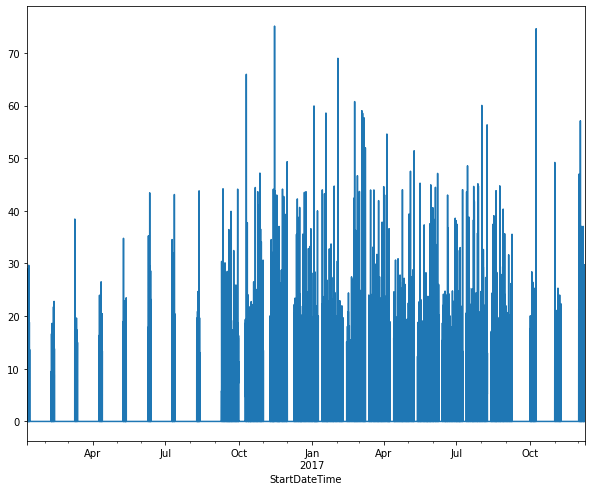

In [126]:
temp = df1['Total kWh']
temp.plot()

In [127]:
#df1 = df1[~(df1 == 0).all(axis=1)]

In [128]:
df1

,Total kWh
StartDateTime,
2016-01-09 07:00:00,3.87
2016-01-09 07:15:00,0.00
2016-01-09 07:30:00,0.00
2016-01-09 07:45:00,0.00
2016-01-09 08:00:00,10.38
...,...
2017-12-08 22:00:00,19.70
2017-12-08 22:15:00,0.00
2017-12-08 22:30:00,0.00


In [129]:
df1['Total kWh'].round(3)

StartDateTime
2016-01-09 07:00:00     3.87
2016-01-09 07:15:00     0.00
2016-01-09 07:30:00     0.00
2016-01-09 07:45:00     0.00
2016-01-09 08:00:00    10.38
                       ...  
2017-12-08 22:00:00    19.70
2017-12-08 22:15:00     0.00
2017-12-08 22:30:00     0.00
2017-12-08 22:45:00     0.00
2017-12-08 23:00:00     1.74
Freq: 15T, Name: Total kWh, Length: 67169, dtype: float64

In [130]:
#df1.to_csv("/content/drive/MyDrive/dataset/Energy/Year 2017_2.csv")

In [131]:
def df1_to_X_y(df1, window_size=5):
  df1_as_np = df1.to_numpy()
  X= []
  y= []
  for i in range(len(df1_as_np)- window_size):
     row = [[a] for a in df1_as_np[i:i+5]]
     X.append(row) 
     label = df1_as_np[i+5]
     y.append(label) 
  return np.array(X), np.array(y)

In [132]:
WINDOW_SIZE = 5
X,y = df1_to_X_y(temp,WINDOW_SIZE)
X.shape, y.shape

((67164, 5, 1), (67164,))

In [133]:
X_train, y_train = X[:6000], y[:6000]
X_val, y_val = X[6000:6500],y[6000:6500]
X_test, y_test = X[6500:],y[6500:]
X_train.shape , y_train.shape, X_val.shape, X_test.shape, y_test.shape

((6000, 5, 1), (6000,), (500, 5, 1), (60664, 5, 1), (60664,))

In [134]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import *
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.losses import MeanSquaredError
# from tensorflow.keras.metrics import RootMeanSquaredError
# from tensorflow.keras.optimizers import Adam

# model1 = Sequential()
# model1.add(InputLayer((5, 1)))
# model1.add(LSTM(64))
# model1.add(Dense(8, 'relu'))
# model1.add(Dense(1, 'linear'))

# model1.summary()


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64,return_sequences = True))
model1.add(LSTM(32,return_sequences = True))
model1.add(LSTM(16))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 5, 64)             16896     
                                                                 
 lstm_7 (LSTM)               (None, 5, 32)             12416     
                                                                 
 lstm_8 (LSTM)               (None, 16)                3136      
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 32,593
Trainable params: 32,593
Non-trainable params: 0
_________________________________________________________________


In [135]:
#model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [136]:
#model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=25, callbacks=[cp1])

Epoch 1/25
183/188 [============================>.] - ETA: 0s - loss: 3.4042 - root_mean_squared_error: 1.8450

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 18s 74ms/step - loss: 3.3282 - root_mean_squared_error: 1.8243 - val_loss: 1.3549 - val_root_mean_squared_error: 1.1640
Epoch 2/25
184/188 [============================>.] - ETA: 0s - loss: 3.2206 - root_mean_squared_error: 1.7946

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 69ms/step - loss: 3.1619 - root_mean_squared_error: 1.7782 - val_loss: 1.2901 - val_root_mean_squared_error: 1.1358
Epoch 3/25
182/188 [============================>.] - ETA: 0s - loss: 3.0770 - root_mean_squared_error: 1.7541

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 69ms/step - loss: 3.0240 - root_mean_squared_error: 1.7390 - val_loss: 1.2516 - val_root_mean_squared_error: 1.1188
Epoch 4/25
181/188 [===========================>..] - ETA: 0s - loss: 3.0282 - root_mean_squared_error: 1.7402

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 67ms/step - loss: 2.9442 - root_mean_squared_error: 1.7159 - val_loss: 1.2375 - val_root_mean_squared_error: 1.1124
Epoch 5/25
184/188 [============================>.] - ETA: 0s - loss: 2.9171 - root_mean_squared_error: 1.7079

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 67ms/step - loss: 2.9033 - root_mean_squared_error: 1.7039 - val_loss: 1.2335 - val_root_mean_squared_error: 1.1106
Epoch 6/25
188/188 [==============================] - ETA: 0s - loss: 2.8760 - root_mean_squared_error: 1.6959

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 68ms/step - loss: 2.8760 - root_mean_squared_error: 1.6959 - val_loss: 1.2194 - val_root_mean_squared_error: 1.1043
Epoch 7/25
187/188 [============================>.] - ETA: 0s - loss: 2.8564 - root_mean_squared_error: 1.6901

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 12s 64ms/step - loss: 2.8487 - root_mean_squared_error: 1.6878 - val_loss: 1.2059 - val_root_mean_squared_error: 1.0981
Epoch 8/25
188/188 [==============================] - ETA: 0s - loss: 2.8195 - root_mean_squared_error: 1.6791

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 70ms/step - loss: 2.8195 - root_mean_squared_error: 1.6791 - val_loss: 1.1892 - val_root_mean_squared_error: 1.0905
Epoch 9/25
186/188 [============================>.] - ETA: 0s - loss: 2.8082 - root_mean_squared_error: 1.6758

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 68ms/step - loss: 2.7899 - root_mean_squared_error: 1.6703 - val_loss: 1.1743 - val_root_mean_squared_error: 1.0837
Epoch 10/25
186/188 [============================>.] - ETA: 0s - loss: 2.6539 - root_mean_squared_error: 1.6291

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 68ms/step - loss: 2.7616 - root_mean_squared_error: 1.6618 - val_loss: 1.1604 - val_root_mean_squared_error: 1.0772
Epoch 11/25
184/188 [============================>.] - ETA: 0s - loss: 2.7708 - root_mean_squared_error: 1.6646

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 68ms/step - loss: 2.7265 - root_mean_squared_error: 1.6512 - val_loss: 1.1411 - val_root_mean_squared_error: 1.0682
Epoch 12/25
183/188 [============================>.] - ETA: 0s - loss: 2.6548 - root_mean_squared_error: 1.6294

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 68ms/step - loss: 2.6917 - root_mean_squared_error: 1.6406 - val_loss: 1.1238 - val_root_mean_squared_error: 1.0601
Epoch 13/25
184/188 [============================>.] - ETA: 0s - loss: 2.6592 - root_mean_squared_error: 1.6307

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 12s 64ms/step - loss: 2.6533 - root_mean_squared_error: 1.6289 - val_loss: 1.1079 - val_root_mean_squared_error: 1.0526
Epoch 14/25
182/188 [============================>.] - ETA: 0s - loss: 2.6691 - root_mean_squared_error: 1.6337

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 69ms/step - loss: 2.6120 - root_mean_squared_error: 1.6162 - val_loss: 1.0818 - val_root_mean_squared_error: 1.0401
Epoch 15/25
182/188 [============================>.] - ETA: 0s - loss: 2.4856 - root_mean_squared_error: 1.5766

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 67ms/step - loss: 2.5648 - root_mean_squared_error: 1.6015 - val_loss: 1.0598 - val_root_mean_squared_error: 1.0295
Epoch 16/25
188/188 [==============================] - ETA: 0s - loss: 2.5172 - root_mean_squared_error: 1.5866

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 68ms/step - loss: 2.5172 - root_mean_squared_error: 1.5866 - val_loss: 1.0514 - val_root_mean_squared_error: 1.0254
Epoch 17/25
183/188 [============================>.] - ETA: 0s - loss: 2.4924 - root_mean_squared_error: 1.5787

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 67ms/step - loss: 2.4650 - root_mean_squared_error: 1.5700 - val_loss: 1.0314 - val_root_mean_squared_error: 1.0156
Epoch 18/25
182/188 [============================>.] - ETA: 0s - loss: 2.2184 - root_mean_squared_error: 1.4894

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 68ms/step - loss: 2.4138 - root_mean_squared_error: 1.5537 - val_loss: 0.9985 - val_root_mean_squared_error: 0.9993
Epoch 19/25
181/188 [===========================>..] - ETA: 0s - loss: 2.3675 - root_mean_squared_error: 1.5387

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 67ms/step - loss: 2.3648 - root_mean_squared_error: 1.5378 - val_loss: 0.9733 - val_root_mean_squared_error: 0.9865
Epoch 20/25
182/188 [============================>.] - ETA: 0s - loss: 2.3395 - root_mean_squared_error: 1.5295

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 69ms/step - loss: 2.3203 - root_mean_squared_error: 1.5233 - val_loss: 0.9500 - val_root_mean_squared_error: 0.9747
Epoch 21/25
182/188 [============================>.] - ETA: 0s - loss: 2.2056 - root_mean_squared_error: 1.4851

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 69ms/step - loss: 2.2750 - root_mean_squared_error: 1.5083 - val_loss: 0.9293 - val_root_mean_squared_error: 0.9640
Epoch 22/25
183/188 [============================>.] - ETA: 0s - loss: 2.2881 - root_mean_squared_error: 1.5127

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 12s 66ms/step - loss: 2.2361 - root_mean_squared_error: 1.4953 - val_loss: 0.9113 - val_root_mean_squared_error: 0.9546
Epoch 23/25
188/188 [==============================] - ETA: 0s - loss: 2.1950 - root_mean_squared_error: 1.4816

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 67ms/step - loss: 2.1950 - root_mean_squared_error: 1.4816 - val_loss: 0.9042 - val_root_mean_squared_error: 0.9509
Epoch 24/25
183/188 [============================>.] - ETA: 0s - loss: 2.1963 - root_mean_squared_error: 1.4820

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 12s 67ms/step - loss: 2.1571 - root_mean_squared_error: 1.4687 - val_loss: 0.8837 - val_root_mean_squared_error: 0.9400
Epoch 25/25
181/188 [===========================>..] - ETA: 0s - loss: 2.0792 - root_mean_squared_error: 1.4419

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


188/188 [==============================] - 13s 67ms/step - loss: 2.1222 - root_mean_squared_error: 1.4568 - val_loss: 0.8658 - val_root_mean_squared_error: 0.9305


In [137]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

,Train Predictions,Actuals
0,0.936943,0.00
1,0.057817,0.00
2,0.130170,0.00
3,5.014531,3.58
4,1.103873,0.00
...,...,...
5995,5.017942,16.06
5996,1.117244,0.00
5997,0.047316,0.00
5998,-0.007104,0.00


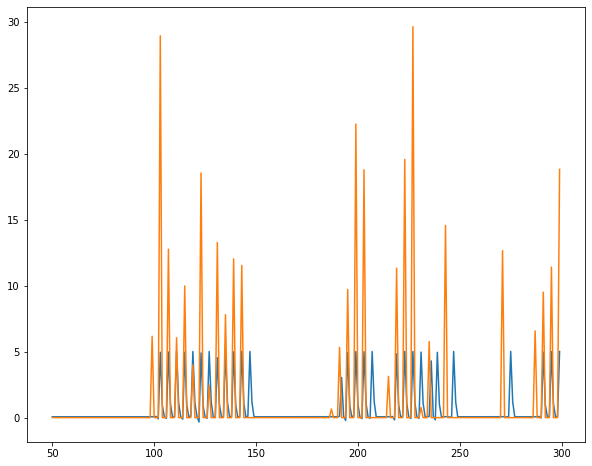

In [138]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:300])
plt.plot(train_results['Actuals'][50:300])

In [139]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

,Val Predictions,Actuals
0,1.113833,0.0
1,0.046809,0.0
2,-0.029549,0.0
3,5.018407,0.0
4,1.201119,0.0
...,...,...
495,0.063533,0.0
496,0.063533,0.0
497,0.063533,0.0
498,0.063533,0.0


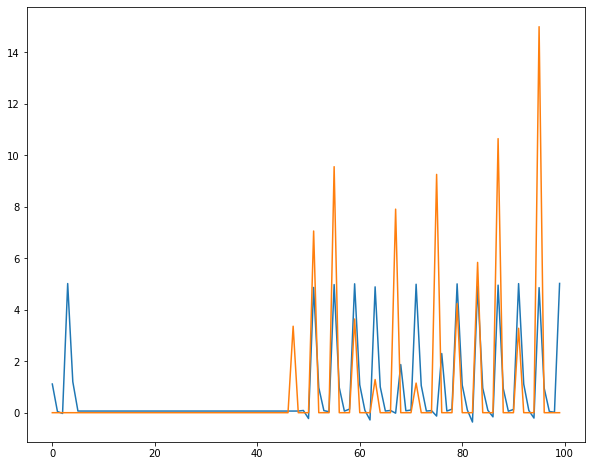

In [140]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [141]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

,Test Predictions,Actuals
0,0.063533,0.00
1,0.063533,0.00
2,0.063533,0.00
3,0.063533,0.00
4,0.063533,0.00
...,...,...
60659,5.023112,19.70
60660,1.086227,0.00
60661,0.046226,0.00
60662,-0.060977,0.00


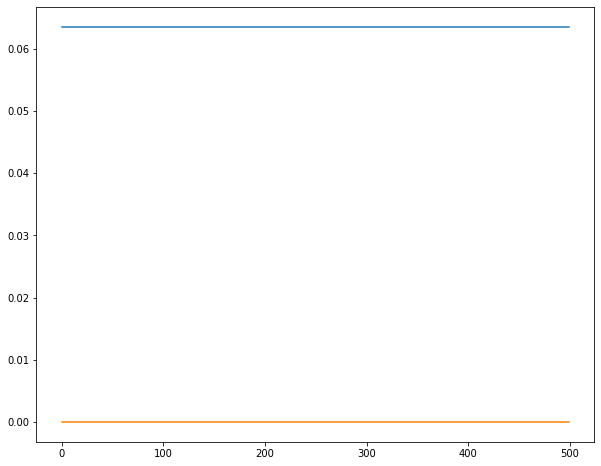

In [142]:
plt.plot(test_results['Test Predictions'][:500])  # blue
plt.plot(test_results['Actuals'][:500]) #red